# Simulation de diffusion du Coronavirus : Problème

<img src="covid19.jpg">

Dans ce projet, nous nous proposons d'étudier la diffusion du Coronavirus Covid-19. Une façon représenter le fait de tomber malade serait de regarder le nombre d'acrs connectant une personne à une autre personne malade.

Les modèles classiques d'épidémies (tels que décrits dans le module modèles SIR d'épidémies ou encore le modèles SI) ont été construits comme des ensembles d'équations différentielles ordinaires (EDO), ce qui implique plusieurs hypothèses simplificatrices. Les équations différentielles ordinaires avec un ensemble donné de conditions initiales conduisent toujours exactement au même résultat. Ces modèles considèrent toujours tous les individus comme égaux ce qui implique que deux individus peuvent interagir avec la même probabilité. Ce n'est pratiquement jamais vrai dans les systèmes réels.

Les réseaux (Network) et l'épidémiologie des maladies infectieuses directement transmises sont fondamentalement liés. Les fondements de l'épidémiologie et des premiers modèles épidémiologiques reposaient sur un mélange aléatoire à l'échelle de la population, mais dans la pratique, chaque individu a un ensemble fini de contacts auxquels il peut transmettre l'infection : l’ensemble de tous ces contacts forme un réseau. La connaissance de la structure du réseau permet aux modèles de calculer la dynamique épidémique à l'échelle de la population à partir du comportement des infections. 

In [3]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

#### Networkx 

Nous considerons deux modèles pour les reseaux d’interactions. Le modèle Erdos-Renyi qui a unedistribution de degre de Poisson et le modèle Barabasi-Albert.

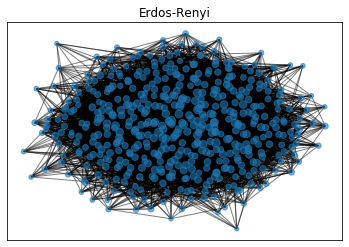

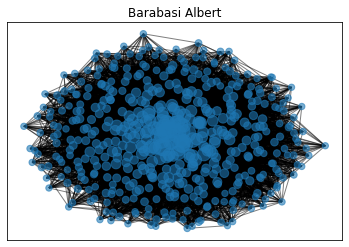

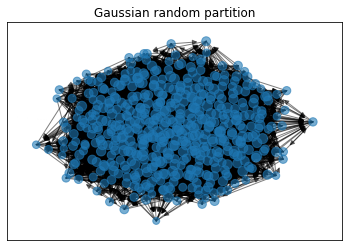

In [41]:

# Taille de la population
N = 500
k = 20
# erdos renyi network
G1 = nx.erdos_renyi_graph(N, k/N)
# barabasi network
G2 = nx.barabasi_albert_graph(N, k)
G3 = nx.gaussian_random_partition_graph(N,20,20,k/N,k/N)

pos1 = nx.spring_layout(G1)
nx.draw_networkx_nodes(G1, pos1, alpha = 0.6, node_size=[2*i for i in list(dict(G1.degree).values())])
nx.draw_networkx_edges(G1, pos1, alpha=0.5)
plt.title("Erdos-Renyi")
plt.show()

pos2 = nx.spring_layout(G2)
nx.draw_networkx_nodes(G2, pos2, alpha = 0.6, node_size=[2*i for i in list(dict(G2.degree).values())])
nx.draw_networkx_edges(G2, pos2, alpha=0.5)
plt.title("Barabasi Albert")
plt.show()

pos3 = nx.spring_layout(G3)
nx.draw_networkx_nodes(G3, pos3, alpha = 0.6, node_size=[2*i for i in list(dict(G3.degree).values())])
nx.draw_networkx_edges(G3, pos3, alpha=0.5)
plt.title("Gaussian random partition")
plt.show()

### Le modèle SI
Le  modèle  SI,  ne  contient  que  deux  classes  d’individus :  ceux  qui  ne  sont  pas  infect ́es  par  lamaladie  (note  S  comme susceptible ou sain)  et  ceux  qui  sont  infect ́es  par  la  maladie  (note I  comme infecte).   Le  modèle  SI  est  la  forme  la  plus  simple  de  tous  les  modèles  de  maladiecontagieuse.  Les individus naissent dans la simulation sans immunit ́e (sensibles).  Une fois infect ́eset sans traitement, les individus restent infect ́es et infectieux tout au long de leur vie et restent encontact avec la population sensible.

<img src="SI.png">

In [40]:
def SI(G,Nb_inf_init,HM, N, T):
    """ function that runs a simulation of an SI model on a network.
    INPUT:
        G(networkx) : Graph
        Nb_inf_init : Initial number of infected people (nodes)
        HM(float) : Infection probability
        N(int): number of nodes (or people)
        T(int): number of time steps simulated
    """
    pos = nx.spring_layout(G)
    A = nx.to_numpy_array(G)
    # setting initial conditions
    sup = np.zeros(T)
    inf = np.zeros(T)
    nb_inf_t = np.zeros(T)
    inf[0] = Nb_inf_init
    sup[0] = N - Nb_inf_init
    nb_inf_t[0] = inf[0]

    for u in G.nodes():
        G.node[u]["state"] = 0
        G.node[u]["noeux_associes"] = [n for n in G.neighbors(u)]
    init = random.sample(G.nodes(), Nb_inf_init)
    for u in init:
        G.node[u]["state"] = 1

    for t in range(1,T):
        sup[t] = sup[t-1]
        inf[t] = inf[t-1]
        for u in G.nodes:
            # si infecté
            if G.node[u]["state"] == 0:
                nb_friend_infected = [G.node[n]["state"] == 1 for n in G.node[u]["noeux_associes"]].count(True)
                for n in G.node[u]["noeux_associes"]:
                    if G.node[n]["state"] == 1: # si voisin infecté
                        # with HM infect
                        if np.random.rand() < HM:
                            G.node[u]["state"] = 1
                            inf[t] += 1
                            sup[t] += -1
                            break
        nb_inf_t[t] = inf[t]-inf[t-1]
    return sup, inf, nb_inf_t

In [10]:
T = 100
N = 500 # Taille de la population
HM = 0.03
Nb_inf_init = 2 # Nombre initial de personne infecté

#### Avec le graphe de Erdos Renyi 

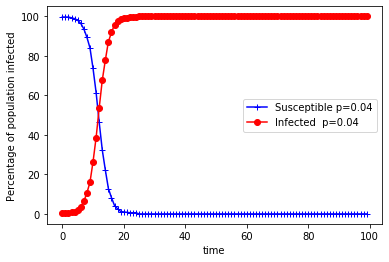

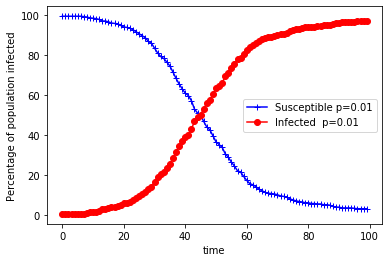

In [8]:
# mean degree of the networks
k = 20
# defining an erdos renyi network
G = nx.erdos_renyi_graph(N,k/N)

s_erdos, inf_erdos,nb_inf_t = SI(G,Nb_inf_init,HM, N, T)
plt.plot((100/N)*s_erdos, color='b',marker='+', label="Susceptible p=0.04")
plt.plot((100/N)*inf_erdos, color='r',marker='o', label="Infected  p=0.04")
plt.xlabel("time")
plt.ylabel("Percentage of population infected")
plt.legend()
plt.show()
# mean degree of the networks
k = 5
# defining an erdos renyi network
G = nx.erdos_renyi_graph(N,k/N)

s_erdos, inf_erdos,nb_inf_t = SI(G,Nb_inf_init,HM, N, T)
plt.plot((100/N)*s_erdos,"b",marker='+', label="Susceptible p=0.01")
plt.plot((100/N)*inf_erdos,"r",marker='o', label="Infected  p=0.01")

plt.xlabel("time")
plt.ylabel("Percentage of population infected")
plt.legend()
plt.show()

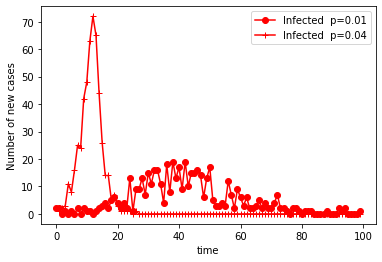

In [7]:
# mean degree of the networks
k = 5
# defining an erdos renyi network
G = nx.erdos_renyi_graph(N,k/N)
s_erdos, inf_erdos,nb_inf_t = SI(G,Nb_inf_init,HM, N, T)
plt.plot(nb_inf_t,"r",marker='o', label="Infected  p=0.01")
plt.xlabel("time")
plt.ylabel("Number of new cases")

k = 20
# defining an erdos renyi network
G = nx.erdos_renyi_graph(N,k/N)
s_erdos, inf_erdos,nb_inf_t = SI(G,Nb_inf_init,HM, N, T)
plt.plot(nb_inf_t,"r",marker='+', label="Infected  p=0.04")
plt.xlabel("time")
plt.ylabel("Number of new cases")

plt.legend()
plt.show()
##

#### Graphe de Erdos Renyi -  Barabasi-Albert

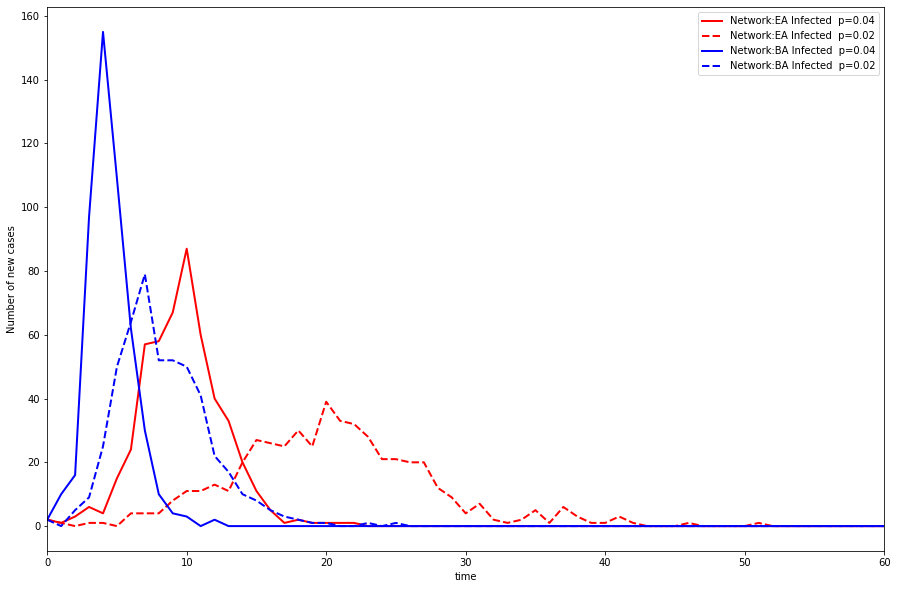

In [44]:
# mean degree of the networks
k = 20
N = 500
Nb_inf_init = 2
# defining an erdos renyi network
G1 = nx.erdos_renyi_graph(N,k/N)
G1_demi = nx.erdos_renyi_graph(N,k/N *0.5)
G2 = nx.barabasi_albert_graph(N, k)
G2_demi = nx.barabasi_albert_graph(N, int(k*0.5))

s_ER, inf_ER,nb_inf_t_ER = SI(G1,Nb_inf_init,HM, N, T)
s_ER_demi, inf_ER_demi,nb_inf_t_ER_demi = SI(G1_demi,Nb_inf_init,HM, N, T)

s_BA, inf_BA,nb_inf_t_BA = SI(G2,Nb_inf_init,HM, N, T)
s_BA_demi, inf_BA_demi,nb_inf_t_BA_demi = SI(G2_demi,Nb_inf_init,HM, N, T)
plt.figure(figsize=(15,10))
plt.plot(nb_inf_t_ER,"r", linewidth=2, label="Network:EA Infected  p=0.04")
plt.plot(nb_inf_t_ER_demi,"r--", linewidth=2, label="Network:EA Infected  p=0.02")


plt.plot(nb_inf_t_BA,"b", linewidth=2, label="Network:BA Infected  p=0.04")
plt.plot(nb_inf_t_BA_demi,"b--", linewidth=2, label="Network:BA Infected  p=0.02")
plt.xlabel("time")
plt.ylabel("Number of new cases")
plt.xlim(0,60)

plt.legend()
plt.show()

### Conclusion 

- Il s'agit d'une propagation d'épidémie de modèle SI qui souligne l'importance de prendre des mesures préventives.
- Les courbes précédentes montrent l’impacte de la quarantaine sur l’ ́evolution du virus, plus il y a de contacte entre les personnes plus le virus se propage rapidement